In [2]:
import os, warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,random_split,Dataset
import torchaudio
from torchaudio import transforms
from torch import Tensor
from torchaudio.datasets.utils import (
    download_url,
    extract_archive,
#     walk_files
)
import matplotlib.pyplot as plt
# from train_utils import *
# from model import *
# from dataloader import *

In [3]:
a = torchaudio.datasets.SPEECHCOMMANDS('./SpeechCommand/' , url = 'speech_commands_v0.02', 
                                       folder_in_archive= 'SpeechCommands', download = True)

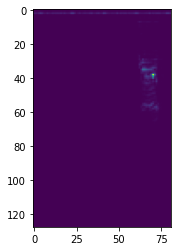

In [21]:

mel_spectogram = torchaudio.transforms.MelSpectrogram(sample_rate=a[0][1])
img = mel_spectogram(a[0][0])
plt.imshow(img[0])
f = plt.figure()



In [3]:
i = iter(torch.utils.data.DataLoader(a))
next(i)

[tensor([[[-0.0658, -0.0709, -0.0753,  ..., -0.0700, -0.0731, -0.0704]]]),
 tensor([16000]),
 ('backward',),
 ('0165e0e8',),
 tensor([0])]

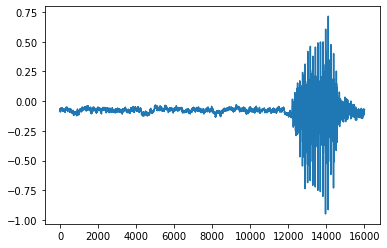

In [44]:
plt.plot(a[0][0].T)
plt.show()

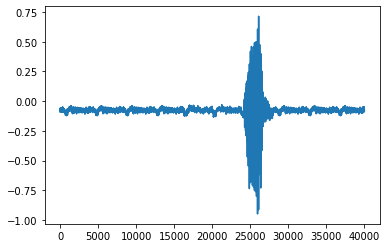

In [43]:
b=a


temp=a[0][0][:,:4000]
n=np.random.randint(0,4)
temp1 =[temp]*n
temp1.append(a[0][0])
temp1.append(temp)
temp1.append(temp)
temp1.append(temp)
temp1=torch.cat(temp1,1)
# temp1=torch.cat((b[0][0],temp),1)
# b[0][0]=torch.cat((b[0][0],temp),1)
# b[0][0].cat(temp,0)
# b[0][0].cat(temp,0)
# b[0][0].cat(temp,0)
plt.plot(temp1.T)
plt.show()

In [41]:
torchaudio.save('amazing_sound.wav', temp1, a[0][1])

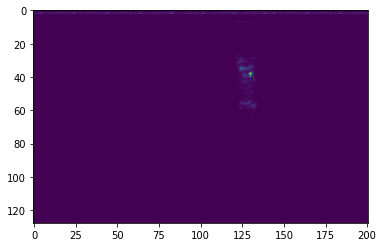

In [47]:
mel_spectogram = torchaudio.transforms.MelSpectrogram(sample_rate=a[0][1])
img = mel_spectogram(temp1)
plt.imshow(img[0])



In [4]:
import os
cl=os.listdir('./SpeechCommand/SpeechCommands/speech_commands_v0.02/')
Class={}
cnt=0
for c in cl:
    Class[c]=cnt
    cnt+=1
Class

{'sheila': 0,
 'house': 1,
 'dog': 2,
 'README.md': 3,
 'validation_list.txt': 4,
 '.DS_Store': 5,
 'go': 6,
 'right': 7,
 'bed': 8,
 'visual': 9,
 'LICENSE': 10,
 'stop': 11,
 'marvin': 12,
 'two': 13,
 'yes': 14,
 'seven': 15,
 'five': 16,
 'one': 17,
 'cat': 18,
 'follow': 19,
 '_background_noise_': 20,
 'off': 21,
 'wow': 22,
 'tree': 23,
 'six': 24,
 'three': 25,
 'forward': 26,
 'up': 27,
 'on': 28,
 'happy': 29,
 'no': 30,
 'zero': 31,
 'learn': 32,
 'backward': 33,
 'down': 34,
 'testing_list.txt': 35,
 'eight': 36,
 'bird': 37,
 'nine': 38,
 'left': 39,
 'four': 40}

In [24]:
os.makedirs("./MelLong",exist_ok=True)
for i in range(12):
    os.makedirs('./MelLong/fold'+str(i),exist_ok=True)

In [26]:
len(a)

105829

In [27]:
metaJson=[]
fold =0
arr = np.arange(len(a))
np.random.shuffle(arr)
fold=0
cnt=0

for i in arr:
    n=np.random.randint(0,4)
    if(cnt%10582==0):
        fold+=1
    cnt+=1
    temp=a[i][0][:,:4000]
    temp1 =[temp]*n
    temp1.append(a[i][0])
    temp1.append(temp)
    temp1.append(temp)
    temp1.append(temp)
    temp1=torch.cat(temp1,1)
    mel_spectogram = torchaudio.transforms.MelSpectrogram(sample_rate=a[i][1])
    img = mel_spectogram(temp1)
    #     img = mel_spectogram(a[i][0])
    img = img[0,:,:]
    file_name="./MelLong/fold"+str(fold)+"/"+a[i][2]+"+"+a[i][3]+"+"+str(a[i][4])+".png"
    file_name2="/fold"+str(fold)+"/"+a[i][2]+"+"+a[i][3]+"+"+str(a[i][4])+".png"
    plt.imsave(file_name,img)
    
    metaJson.append({'file_name':file_name2,'classID':Class[a[i][2]],'class':a[i][2]})


    
    

In [30]:
metaJson

[{'file_name': '/fold1/off+6736bc64+0.png', 'classID': 21, 'class': 'off'},
 {'file_name': '/fold1/four+2748cce7+1.png', 'classID': 40, 'class': 'four'},
 {'file_name': '/fold1/left+978240e1+2.png', 'classID': 39, 'class': 'left'},
 {'file_name': '/fold1/left+f8ba7c0e+2.png', 'classID': 39, 'class': 'left'},
 {'file_name': '/fold1/one+76b58705+0.png', 'classID': 17, 'class': 'one'},
 {'file_name': '/fold1/yes+61ab8fbc+2.png', 'classID': 14, 'class': 'yes'},
 {'file_name': '/fold1/two+f7879738+2.png', 'classID': 13, 'class': 'two'},
 {'file_name': '/fold1/bed+105e72bb+0.png', 'classID': 8, 'class': 'bed'},
 {'file_name': '/fold1/four+1d1fe0a0+0.png', 'classID': 40, 'class': 'four'},
 {'file_name': '/fold1/yes+d3831f6a+4.png', 'classID': 14, 'class': 'yes'},
 {'file_name': '/fold1/down+0f7266cf+2.png', 'classID': 34, 'class': 'down'},
 {'file_name': '/fold1/tree+c1b7c224+0.png', 'classID': 23, 'class': 'tree'},
 {'file_name': '/fold1/six+92037d73+0.png', 'classID': 24, 'class': 'six'},
 

In [32]:
for meta in metaJson:
    meta['file_name']=meta['file_name'].split("/")[-1]


In [33]:
import json
jsonString = json.dumps(metaJson,)
for folds in range(0,12):
    with open('./MelLong/fold'+str(folds)+'/metadata.jsonl', 'w') as outfile:
        for entry in metaJson:
            json.dump(entry, outfile)
            outfile.write('\n')

In [15]:
import json

jsonString = json.dumps(metaJson,)
with open('./MelLong/metadata.jsonl', 'w') as outfile:
    for entry in metaJson:
        json.dump(entry, outfile)
        outfile.write('\n')
    

In [17]:
a[1]

(tensor([[-0.0003, -0.0002, -0.0005,  ...,  0.0005,  0.0007,  0.0010]]),
 16000,
 'backward',
 '017c4098',
 0)

In [14]:
label2id=Class
id2label = {v: k for k, v in Class.items()}


with open("./MelLong/"+'id2label.json', 'w') as outfile:
    json.dump(id2label,outfile)
with open("./MelLong/"+'label2id.json', 'w') as outfile:
    json.dump(label2id,outfile)

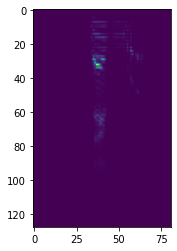

In [35]:
fig = plt.figure()
plt.imshow(mel[0,:,:].numpy())

In [37]:
plt.imsave("TEST.png",mel[0,:,:].numpy())

In [39]:
os.walk('./SpeechCommand/SpeechCommands/speech_commands_v0.02/')

<generator object walk at 0x7f2ed02e6e40>

['sheila',
 'house',
 'dog',
 'README.md',
 'validation_list.txt',
 '.DS_Store',
 'go',
 'right',
 'bed',
 'visual',
 'LICENSE',
 'stop',
 'marvin',
 'two',
 'yes',
 'seven',
 'five',
 'one',
 'cat',
 'follow',
 '_background_noise_',
 'off',
 'wow',
 'tree',
 'six',
 'three',
 'forward',
 'up',
 'on',
 'happy',
 'no',
 'zero',
 'learn',
 'backward',
 'down',
 'testing_list.txt',
 'eight',
 'bird',
 'nine',
 'left',
 'four']

In [89]:
file1 = open('./MelLong/metadata.jsonl', 'r')
Lines = file1.readlines()
MetaJSON=[]
for line in Lines:
    t = json.loads(line.split("\n")[0])
    fileName = t['file_name'].split("/")
    fileName = fileName[-2]+"/"+fileName[-1]
    t['file_name']=fileName
    MetaJSON.append(t)


In [90]:
MetaJSON

[{'file_name': 'fold1/no+92a9c5e6+3.png', 'classID': 30, 'class': 'no'},
 {'file_name': 'fold1/bed+311fde72+0.png', 'classID': 8, 'class': 'bed'},
 {'file_name': 'fold1/wow+7d6b4b10+0.png', 'classID': 22, 'class': 'wow'},
 {'file_name': 'fold1/no+71aa5b54+0.png', 'classID': 30, 'class': 'no'},
 {'file_name': 'fold1/five+08ab231c+0.png', 'classID': 16, 'class': 'five'},
 {'file_name': 'fold1/on+bbf38549+2.png', 'classID': 28, 'class': 'on'},
 {'file_name': 'fold1/bed+14c7b073+0.png', 'classID': 8, 'class': 'bed'},
 {'file_name': 'fold1/follow+27c24504+2.png',
  'classID': 19,
  'class': 'follow'},
 {'file_name': 'fold1/seven+39833acb+2.png', 'classID': 15, 'class': 'seven'},
 {'file_name': 'fold1/follow+332d33b1+0.png',
  'classID': 19,
  'class': 'follow'},
 {'file_name': 'fold1/down+ff2b842e+3.png', 'classID': 34, 'class': 'down'},
 {'file_name': 'fold1/six+b66f4f93+6.png', 'classID': 24, 'class': 'six'},
 {'file_name': 'fold1/follow+f68160c0+0.png',
  'classID': 19,
  'class': 'follo

In [87]:
json.loads(Lines[1].split("\n")[0])

{'file_name': './Mel/fold1/bed+311fde72+0.png', 'classID': 8, 'class': 'bed'}

In [18]:
import json

jsonString = json.dumps(metaJson,)
for folds in range(0,12):
    with open('./MelLong/fold'+str(folds)+'/metadata.jsonl', 'w') as outfile:
        for entry in metaJson:
            json.dump(entry, outfile)
            outfile.write('\n')

In [17]:
metaJson

[{'file_name': 'nine+953fe1ad+0.png', 'classID': 38, 'class': 'nine'},
 {'file_name': 'house+86648261+4.png', 'classID': 1, 'class': 'house'},
 {'file_name': 'cat+5be23def+0.png', 'classID': 18, 'class': 'cat'},
 {'file_name': 'three+fa57ab3b+3.png', 'classID': 25, 'class': 'three'},
 {'file_name': 'left+3c8dc702+0.png', 'classID': 39, 'class': 'left'},
 {'file_name': 'one+8bf6acb9+1.png', 'classID': 17, 'class': 'one'},
 {'file_name': 'cat+8dc18a75+0.png', 'classID': 18, 'class': 'cat'},
 {'file_name': 'bed+7ff085e1+1.png', 'classID': 8, 'class': 'bed'},
 {'file_name': 'on+789e4ee7+0.png', 'classID': 28, 'class': 'on'},
 {'file_name': 'no+fa52ddf6+0.png', 'classID': 30, 'class': 'no'},
 {'file_name': 'three+5769c5ab+0.png', 'classID': 25, 'class': 'three'},
 {'file_name': 'four+10ace7eb+4.png', 'classID': 40, 'class': 'four'},
 {'file_name': 'five+b528edb3+2.png', 'classID': 16, 'class': 'five'},
 {'file_name': 'happy+07c5129e+0.png', 'classID': 29, 'class': 'happy'},
 {'file_name': '